# Enunciado
Implementar y analizar el comportamiento del enfriamiento simulado para alcanzar
la solución óptima del problema que se describe a continuación:

Obtener el mínimo global de la siguiente función:

$$
f(x) = \dfrac{cos(x)}{x}, x \in [0,30]
$$

Mostrar gráficamente la evolución de los valores de $x$ y $f$ considerados a lo largo de
las iteraciones de la metaheurística.



##### La siguiente celda muestra los imports necesarios para poder ejecutar el agoritmo

In [1]:
import funciones as fn
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt
import graficos as gf

print("Se han cargado todas las librerias necesaias")

Se han cargado todas las librerias necesaias


### Seleccionar las características del algoritmo

#### Seleccionar la función a optimizar, definir el intervalo.

In [2]:
INTERVALO = (0,30)
FUNCION  = fn.funcion_enunciado

### Funciones del algoritmo

Obtener un vecino a una solución

In [3]:
def vecindad(x, movimiento=1):
    vecindad = (INTERVALO[1] - INTERVALO[0]) * movimiento / 10
    delta = (-vecindad/2.) + vecindad * rnd.random_sample()
    return fn.ajustar_valor(delta+x, INTERVALO)

Probabilidad con la que se va a aceptar una solución

In [4]:
def probabilidad_aceptacion(y, y_nuevo, temperatura):
    # si mejora la solución actual se acepta siempre
    if y_nuevo < y:
        return 1
    # en caso contrario, la aceptación dependerá de la temperatura,
    # a medida que avanza el problema menor temperatura, menor probabilidad de aceptación
    else:
        probabilidad = np.exp(- (y_nuevo - y) / temperatura)
        return probabilidad

Variación de la temperatura a medida que avanza el algoritmo

In [5]:
def temperatura(estado):
    return max(0.01, min(1, 1 - estado))

### Algoritmo

Algoritmo en pseudocódigo aquí

In [39]:
def recocido_simulado(funcion,
                      vecindad,
                      x_inicial,
                      probabilidad_aceptacion,
                      temperatura,
                      max_iteraciones=1000,
                      informacion=1):
    x = x_inicial
    y = funcion(x)
    valores_x, valores_y = [x], [y]
    valores_t = []
    for iteracion in range(max_iteraciones):
        estado = iteracion / float(max_iteraciones)
        T = temperatura(estado)
        valores_t.append(T)
        x_vecina = vecindad(x, estado)
        y_vecina = funcion(x_vecina)
        if informacion >= 1:
            print("Tteracion #{:>2}/{:>2} : T = {:>4.3g}, x = {:>4.3g}, y = {:>4.3g}, x_vecina = {:>4.3g}, y_vecina = {:>4.3g}".format(iteracion, max_iteraciones, T, x, y, x_vecina, y_vecina))
        if probabilidad_aceptacion(y, y_vecina, T) > rnd.random():
            x,y = x_vecina, y_vecina
            valores_x.append(x)
            valores_y.append(y)
    return x, funcion(x), valores_x, valores_y, valores_t

### Ejecución del algoritmo

In [40]:
x, y, valores_x, valores_y, valores_t = recocido_simulado(FUNCION, vecindad, 10, probabilidad_aceptacion, temperatura,informacion=2)

Tteracion # 0/1000 : T =    1, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0839
Tteracion # 1/1000 : T = 0.999, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0839
Tteracion # 2/1000 : T = 0.998, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0837
Tteracion # 3/1000 : T = 0.997, x =   10, y = -0.0837, x_vecina =   10, y_vecina = -0.0836
Tteracion # 4/1000 : T = 0.996, x =   10, y = -0.0836, x_vecina =   10, y_vecina = -0.0836
Tteracion # 5/1000 : T = 0.995, x =   10, y = -0.0836, x_vecina =   10, y_vecina = -0.0839
Tteracion # 6/1000 : T = 0.994, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0841
Tteracion # 7/1000 : T = 0.993, x =   10, y = -0.0841, x_vecina =   10, y_vecina = -0.0837
Tteracion # 8/1000 : T = 0.992, x =   10, y = -0.0837, x_vecina =   10, y_vecina = -0.0834
Tteracion # 9/1000 : T = 0.991, x =   10, y = -0.0834, x_vecina =   10, y_vecina = -0.0827
Tteracion #10/1000 : T = 0.99, x =   10, y = -0.0827, x_vecina =   10, y_vecina = -0.0822
T

### Visualización de los resultados del algoritmo

Solución x: 22.26610391054602
Calidad de la solución x, f(x):-0.0432243255966745


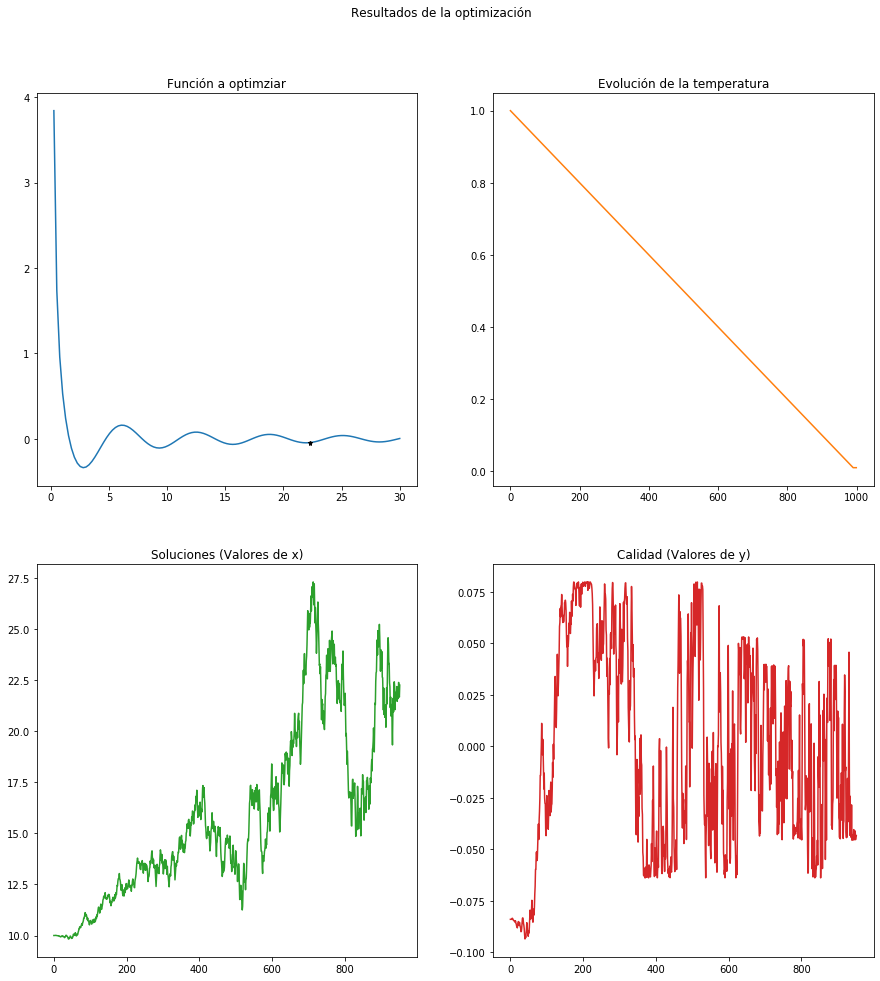

In [8]:
gf.plot_results(FUNCION, INTERVALO, valores_x, valores_y, valores_t)